In [1]:
import torch
from PIL import Image
from torchvision.transforms import v2
from module.model_builder.model import Model

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoints = torch.load("checkpoints0/checkpoint-30.pth.tar", map_location=device)
vocab = checkpoints['vocab']

# Create instance model
n_dim_model = 512
# --- Encoder Parameters ---
input_chanel_encoder = 3
hidden_dim_encoder = 768
n_head_encoder = 12
n_expansion_encoder = 4
n_layer_encoder = 12
# --- Decoder Parameters ---
n_head_decoder = 8
seq_length_decoder = 224
vocab_size_decoder = len(vocab)
n_expansion_decoder = 4
n_layer_decoder = 6
model = Model(n_dim_model, input_chanel_encoder, hidden_dim_encoder, n_head_encoder, n_expansion_encoder, n_layer_encoder,
              n_head_decoder, seq_length_decoder, vocab_size_decoder, n_expansion_decoder, n_layer_decoder).to(device)
model.load_state_dict(checkpoints['model_state_dict'])

<All keys matched successfully>

In [2]:
transform = v2.Compose([
    v2.PILToTensor(),
    v2.ToDtype(torch.float)
])

In [3]:
idx_start = vocab['<start>']
idx_end = vocab['<end>']

In [4]:
print(idx_start, idx_end)

1 2


In [5]:
import random

paths = []
true_labels = []
with open('dataset/val.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
    temp = random.sample([i for i in range(len(lines))], 150)
    for idx in temp:
        line = lines[idx]
        line = line.rstrip()
        image_path, label = line.split('--------')
        paths.append(image_path)
        true_labels.append(label)

Thông tin trường được đánh giá tuyên bảo giá chọn
bạn có thể liên hệ trực tiếp


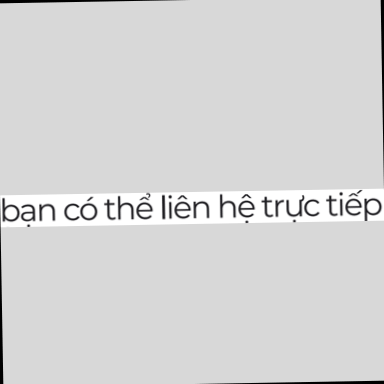

Thẩm phu nhân cầm lấy một thanh cạm rỗng làm thành nhiều nhiều nhật,
bất quá là thay đổi cái khuôn mẫu, chưa nói tới thiếu cân thiếu lạng, trở về chờ,


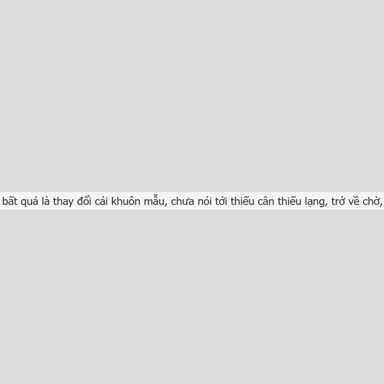

The Dewey shool cũng mong
Nhưng khi áp dụng vào thực


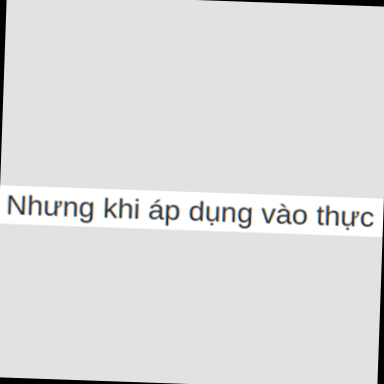

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
thể bị buộc tội hiếp dâm


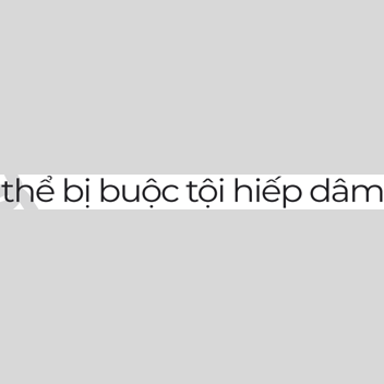

Thôn Tân Phú Vũn Lạn Văn Khánh Hoà Hoà
Ấp Tường Tư Hưng Phú Phước Long Bạc Liêu


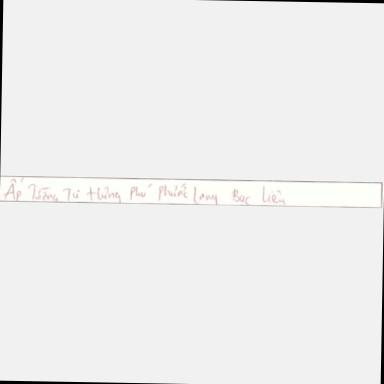

Trường đại học Sư phạm Hà Nội đã ứng tuyển,
kiểm tra nhằm thực hiện tốt nhất các quy định


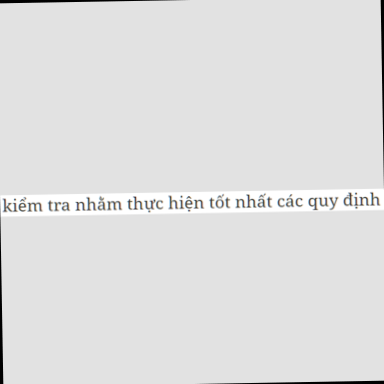

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Ấp Tầm Vu 8 Thạnh Hoà Phụng Hiệp Hậu Giang


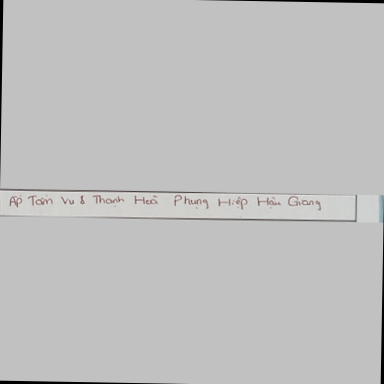

Trường THCS Ngoại ngữ, thuộc Trường đại học Ngữ Đại học Quốc Hà Nội
sẽ hỗ trợ ta thực hiện tính toán các moments. Kết quả trả về là một dictionary như sau:


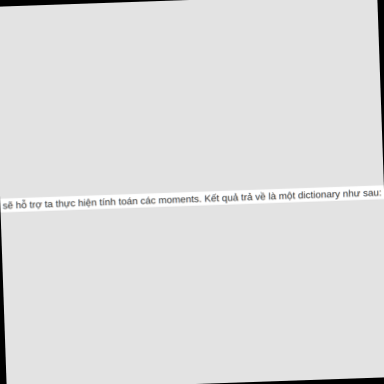

Trong đó, Trường đại học Kinh tế quốc dân năm 2024 lực tiên
chấp hành luật của lái xe thay vì quản lý từng hành vi đơn lẻ;


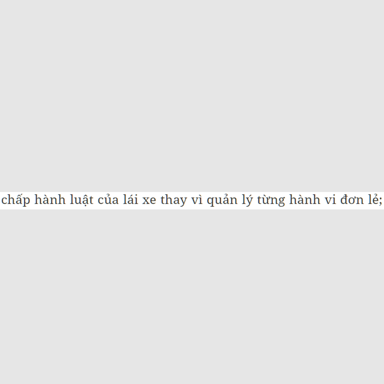

Trường THCS Ngoại ngữ tuyển sinh 100 chỉ tiêu vào lớp
Các bộ lọc trình bày trước đó cho thấy có xu hướng


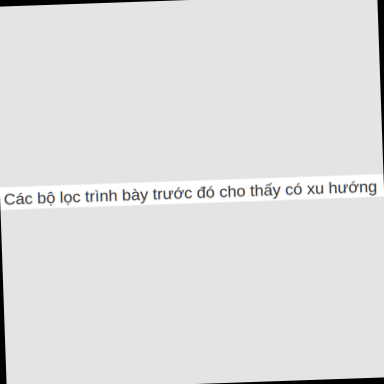

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Thôn Bẹt Cẩm Thạch Cẩm Thuỷ Thanh Hoá


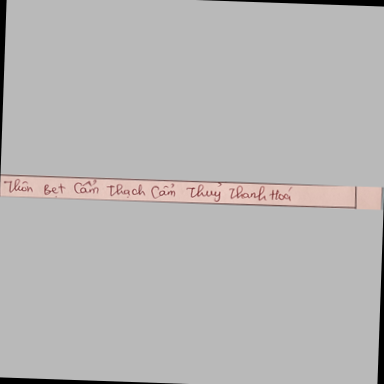

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Quỳnh Hồng Quỳnh Phụ Thái Bình


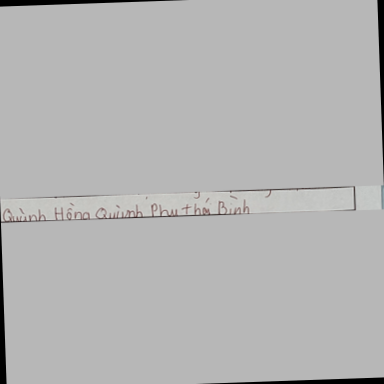

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
S922 Tôn Thất Thuyết Phường 81 Quận 5 Hồ Chí Minh


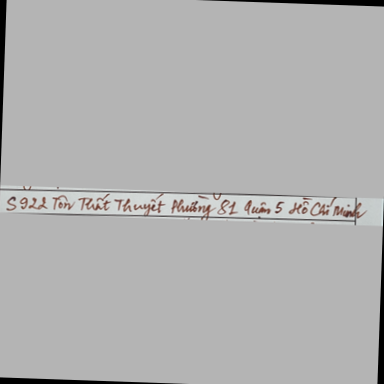

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Thôn Phú Giang Phú Gia Hương Khê Hà Tĩnh


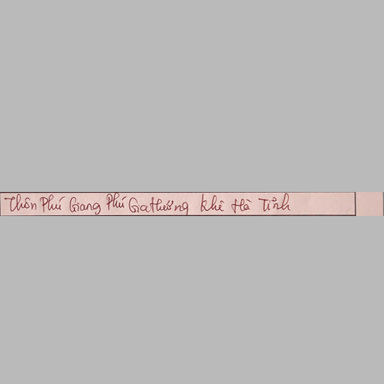

Thẩm phu nhân cầm lấy một thanh chạm rỗng làm thành
Thẩm phu nhân ăn táo nhi, hộc ra hạch nhi.


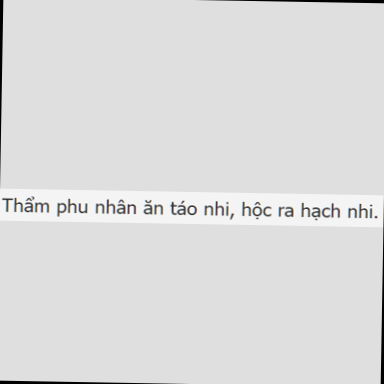

The most comon method for ensuring a small weight vector is to as dits norm as a
[3] AN IMAGE IS WORTH 16X16 WORDS: TRANSFORMERS FOR IMAGE RECOGNITION AT


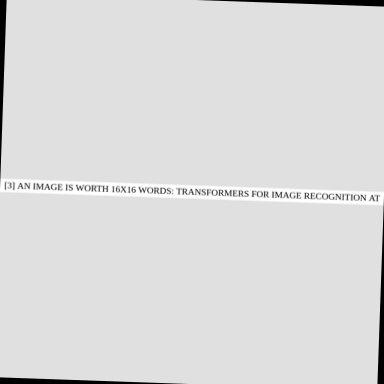

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Thôn Lạc Sơn Lạc Lâm Đơn Dương Lâm Đồng


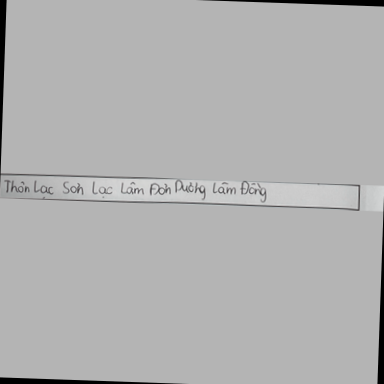

Trong đó, Trường đại học Sư phạm Hà Nội
(nhất là khi các trường có tổ chức xét tuyển


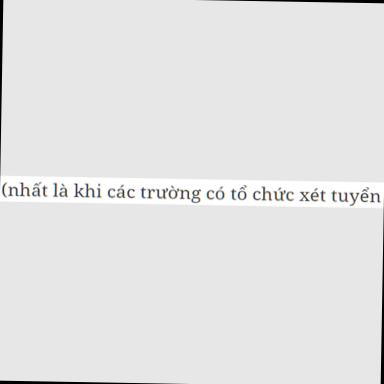

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
P173 C/c 59 24 N T Bình P Nguyễn Thái Bình T Tp Hcm


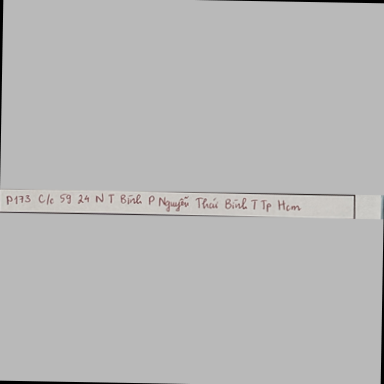

Thôn Tân Phú Vũn Lạn Văn Khánh Hoà Hoà
Tổ 9 Kp Tân Mỹ P Thái Hoà Thị Xã Tân Uyên Bình Dương


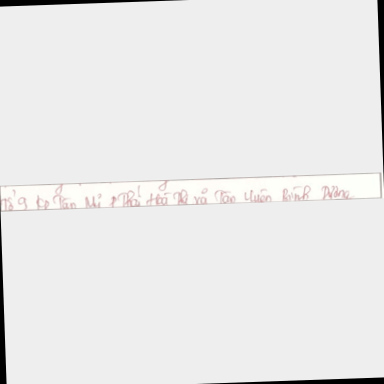

The most comon method for enensuring a smasure the of wer this a sourmatl, as a
đại lao môn đạo, ai biết hôm nay vừa  lên tới liền xông cái đại họa. Nguyên bản tưởng nhanh lên mang nàng đi, đáng tiếc


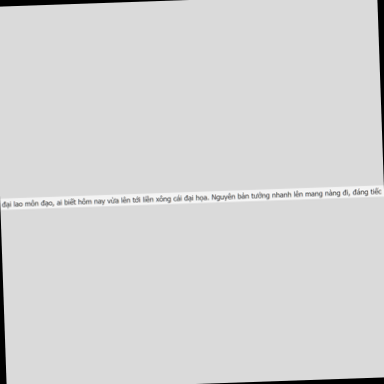

Trong đó, phương thức xét tuyển bằng 120
vì một việt nam khỏe mạnh và bền vững


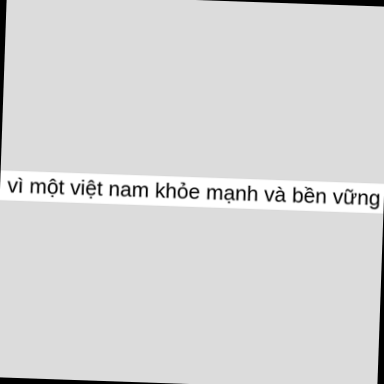

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Tổ 33 Pom Hán Thành Phố Lào Cai Lào Cai


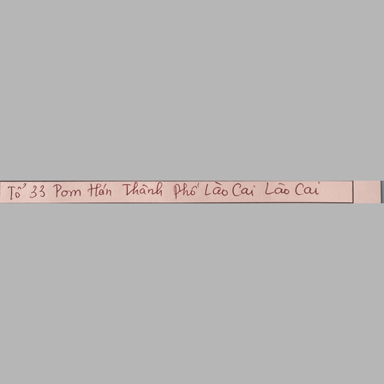

Trong khi nhiều trường công lập cơ bản giữ ổn định chỉ tiêu
Tìm ra các contour từ ảnh nhị phân đã được chuyển sang gray


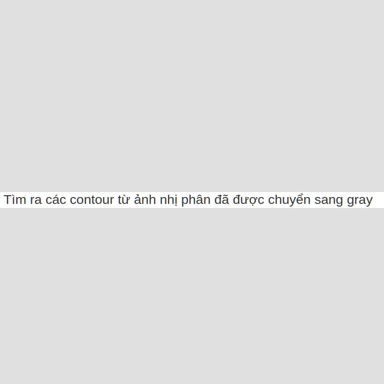

Thẩm gia đại gia thực hiếu thuận mẫu thân, đối đệ
Ta quan  trên trình tư thẳng phía trước giúp bọn


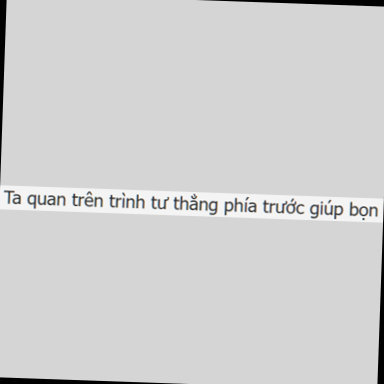

Thẩm phu nhân gật gật đầu, nói:
Bên này pháo hoa cười nói đến:


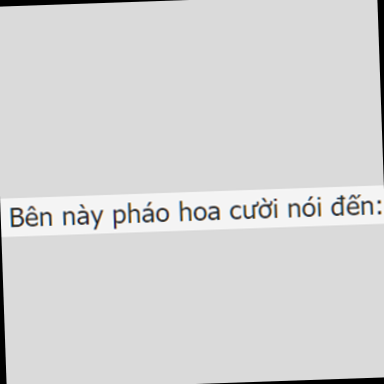

Cái kết của phim giúp mình thấy rõ Eugine luận của Hùng
Khoảng giữa buổi phỏng vẫn diễn viên Trần Nữ Yên Khê cần rời đi trước.


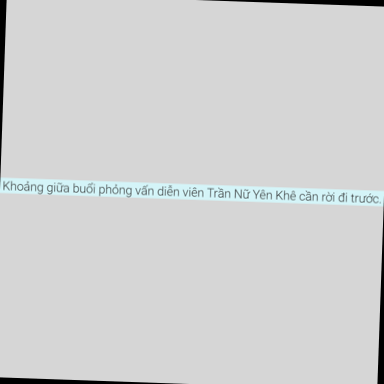

The most comon method for enensuring a smasure the of wer as to itens as somas trweits tive
quả nhiên ngọt thanh, bên trong thả ướp quá hoa mai cùng mứt, điểm tâm là màu trắng bánh gạo bỏ thêm một ít đường,


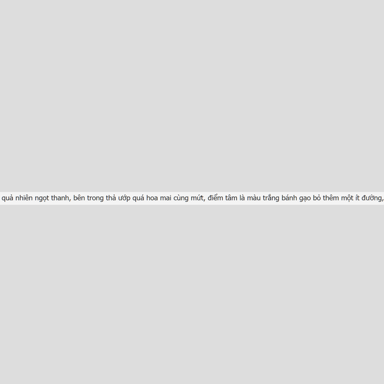

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Thôn Lũng Hoa Đại Phú Sơn Dương Tuyên Quang


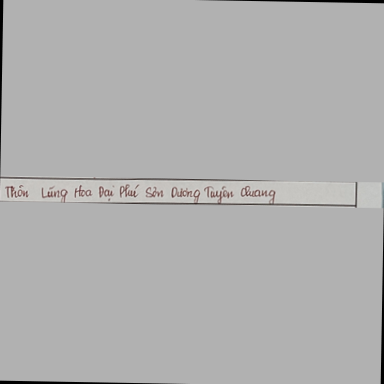

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
FUSION MODULE SẼ TỔNG HỢP


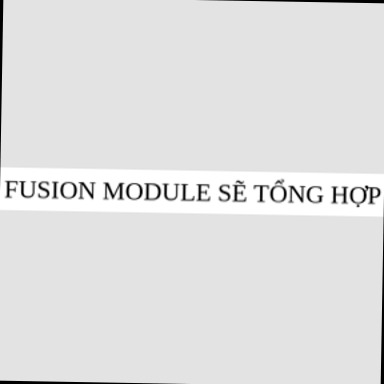

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Phước Trung Thành Phố Bà Rịa Bà Rịa Vũng Tàu


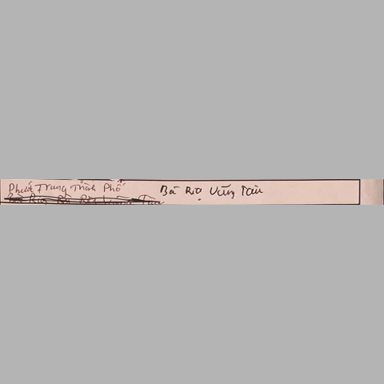

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Trần Phú Thị Trấn Bắc Sơn Bắc Sơn Lạng Sơn


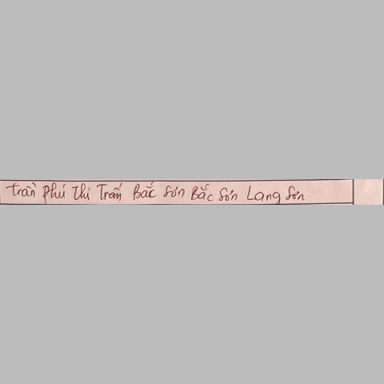

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Thôn An Tĩnh Yên Bình Ý Yên Nam Định


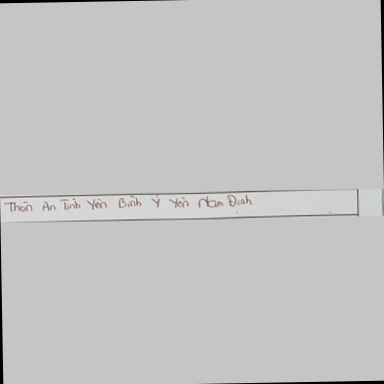

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
35 Đỗ Quang Vĩnh Trung Thanh Khê Đà Nẵng


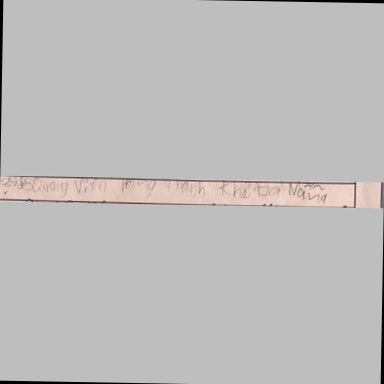

The we datweiste the dethiffflllur and thead datcasen of initimitting
cũng là thông cảm các nàng không dễ dàng, thả chúng ta mấy cái đề lớn, phụ thân liền duẫn."


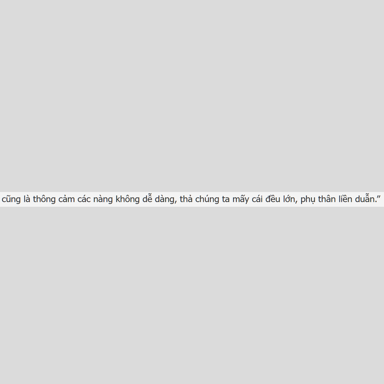

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Xóm Cốc Lùng Yên Sơn Hà Quảng Cao Bằng


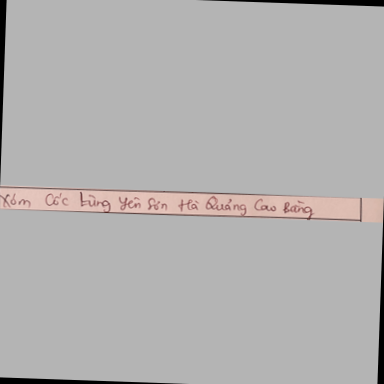

Trường THCS Ngoại ngữ tuyển sinh 100 chỉ tiêu vào lớp 6
+ Dân ta đánh đổ các xiềng xích phong kiến, thực dân, phát xít.


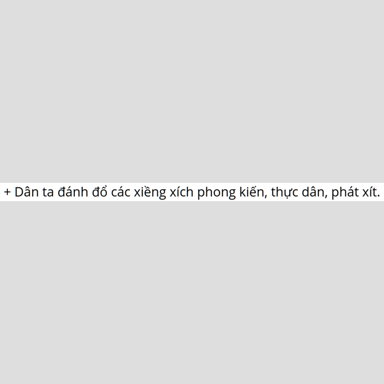

Trường THCS Ngoại ngữ tuyển sinh 100 chỉ tiêu vào lớp 6
Bước thứ 2 là bước "Scale", đơn giản chỉ là chia "Score"


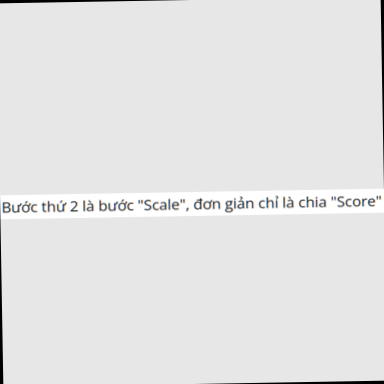

Trong đó, phương thức xét tuyển bằng 12 lệ có
(1 = đã kết hôn, 2 = độc thân, 3 = khác)


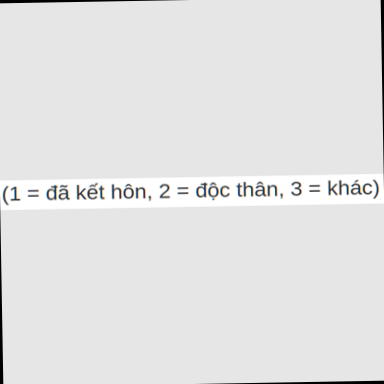

Thẩm phu nhân cầm lấy một thanh cạm rỗng làm thành nhiều nhiều nhật,
Đang định về  sau đều không cần nhìn thấy cái này an gia đại cô nương Trịnh Bình,


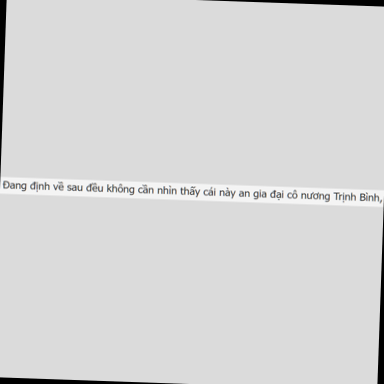

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Tổ 42 Khu 1 Cao Thắng Hạ Long Quảng Ninh


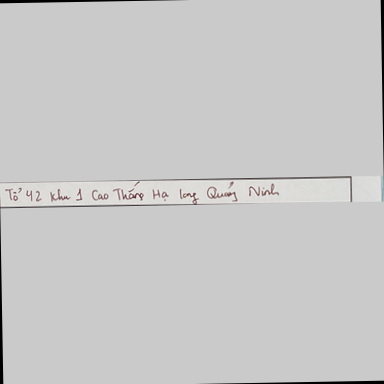

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Hoằng Phú Hoằng Hoá Thanh Hoá


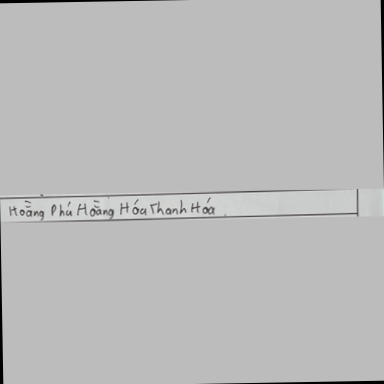

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Đông Hồ Thuỵ Phong Thái Thuỵ Thái Bình


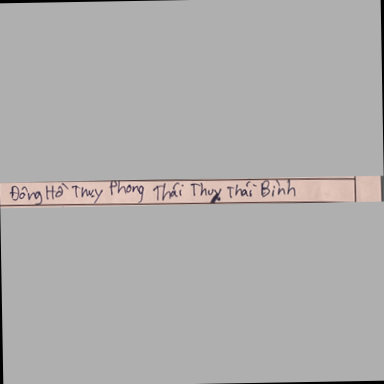

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
mạng thai ngoài ý


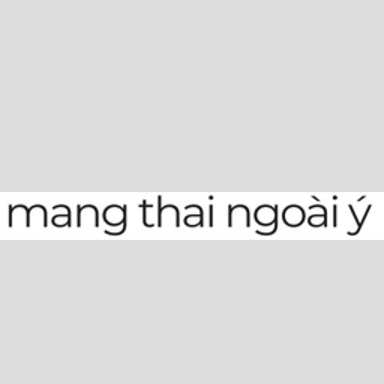

Trường THCS Ngoại ngữ tuyển sinh 100 chỉ tiêu vào lớp
+ Ngày 3-2-1930, thành lập đảng cộng sản Việt Nam.


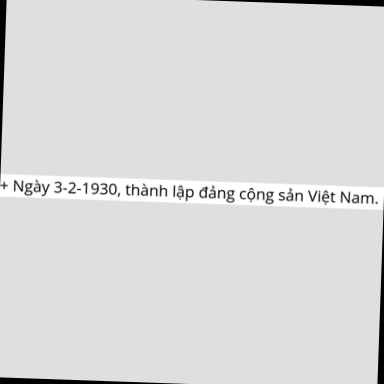

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Thôn 7 Văn Sơn Triệu Sơn Thanh Hoá


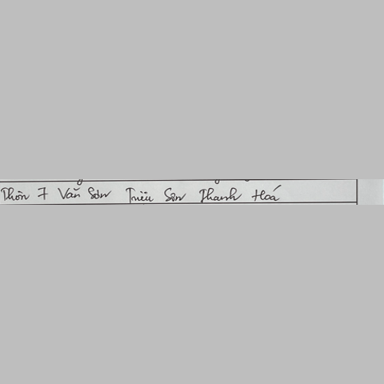

Thôn Tri Lễ Tân Ước Thanh Oai Hà Nội
nam giới từng là nạn nhân


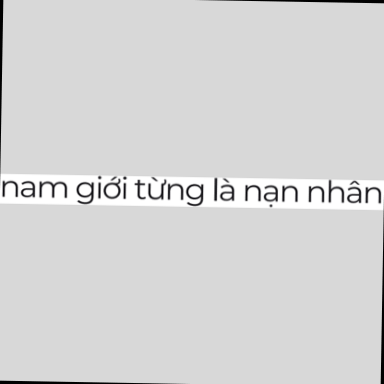

Theo báo cáo của một cuộc khảo sát
là nạn nhân bị bạn tình cưỡng hiếp.


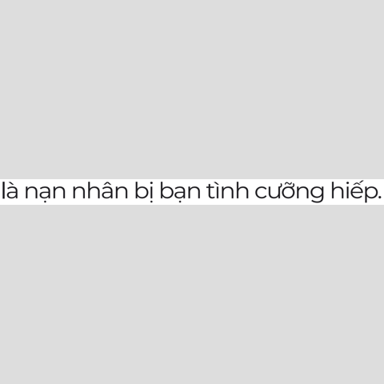

Theo báo cáo của một cuộc khảo sát
của các tổ chức, doanh nghiệp


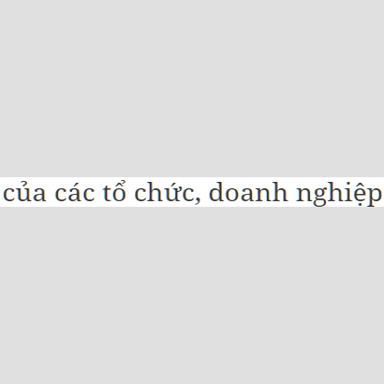

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Nam Hương 9 Tân Hương Bắc Sơn Lạng Sơn


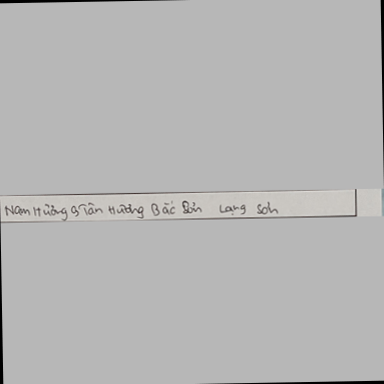

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Đà Sơn Đô Lương Nghệ An


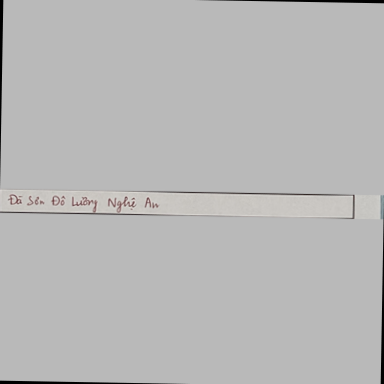

Trường đại học Sư phạm Hà Nội
SỐ TRUY VẤN MÀU SẮC (COLOR QUERIES): 100


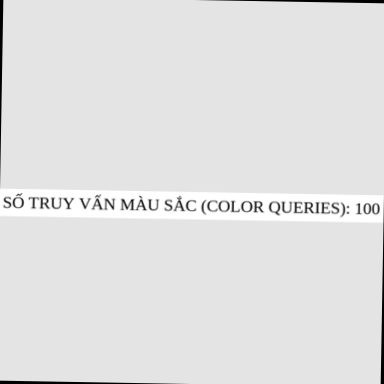

Thẩm phu nhân cầm lấy một thanh chạm rỗng làm thành
"Không nghĩ tới ngươi nghĩ vậy một bước.


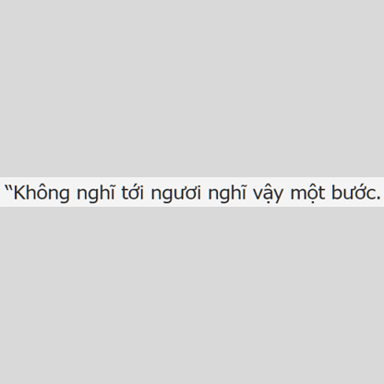

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Mỹ Thạnh Trung 7 Hoà Phong Tây Hoà Phú Yên


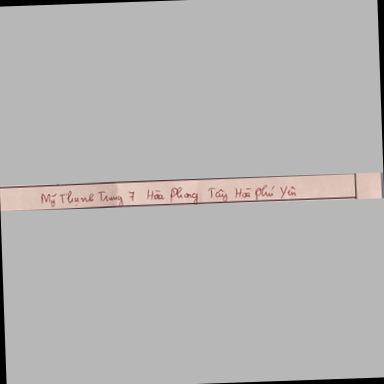

Thôn Tân Phú Vũn Lạn Văn Khánh Hoà Hoà
Thanh Yên Tân Thiềng Chợ Lách Bến Tre


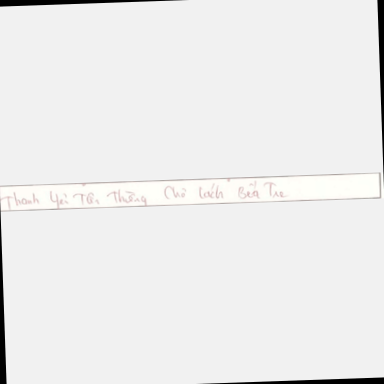

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
tiền xử lý hình ảnh


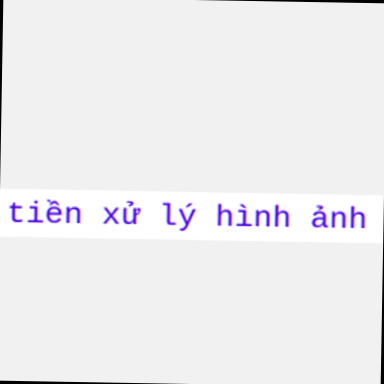

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Xóm Pạnh Bao La Mai Châu Hoà Bình


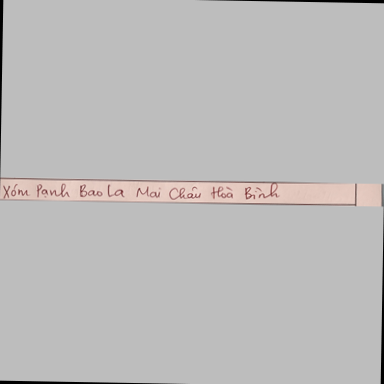

Trong giai đoạn là tin cả ý huận là việc.
The taste of things TRAN ANH HUNG


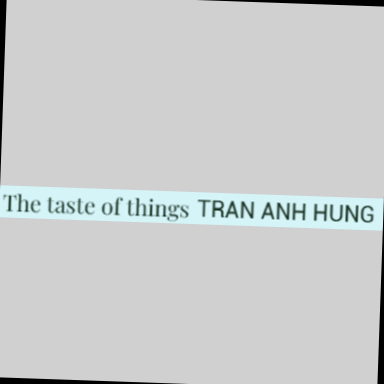

Trong đó, Trường đại học Kinh tế quốc dân năm 2024 lực tiên
10.000 tên miền độc hại, trong đó có hơn 2.700 tên miền lừa đảo trực tuyến.


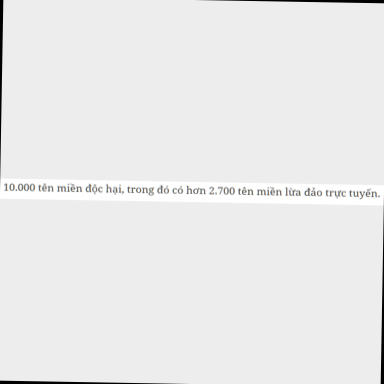

Thẩm gia đại gia, bấy quả tiền gia điểm rộu hi chuyện
phải thị vệ, ăn mặc màu xanh ngọc mỏng bào,


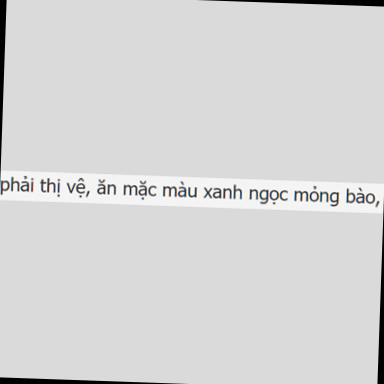

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Tân Học Thái Thuỵ Thái Bình


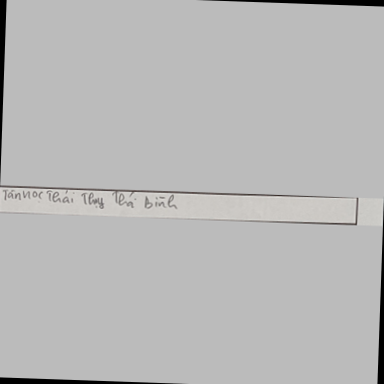

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
345 Lô D Mạc Thiên Tích Phường 16 Quận 6 Hồ Chí Minh


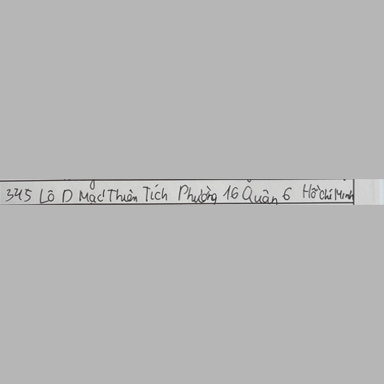

Trong đó, Trường đại học Kinh tế quốc dân năm 2024 lực tiên
bệnh ghẻ do ký sinh trùng Sarcoptes scabiei var hominis gây


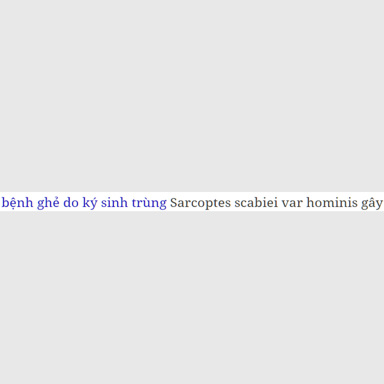

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Thôn Rúp Trung Hà Thuỷ Nguyên Hải Phòng


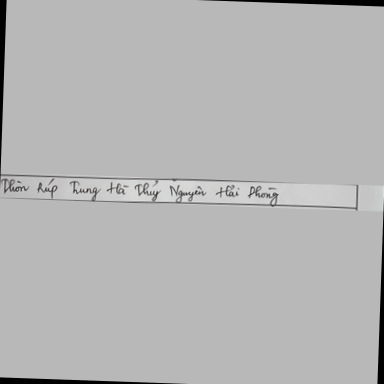

Thứ còn để lại được, sẽ đọn là giữa
sẽ đẹp lên.


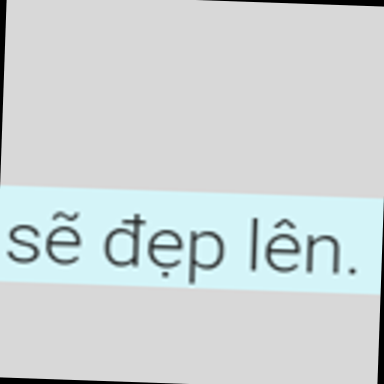

Trong đó, phương thức xét tuyển bằng 120
pháp hữu ích tại Việt Nam là 9,8%. Các


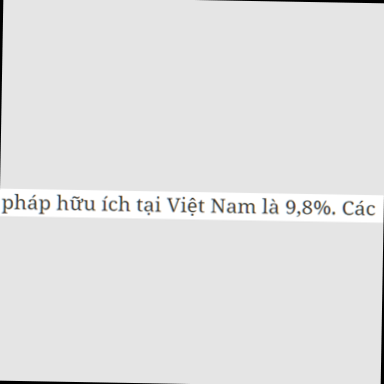

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
619 Ấp 4 Phú Xuân Nhà Bè Hồ Chí Minh


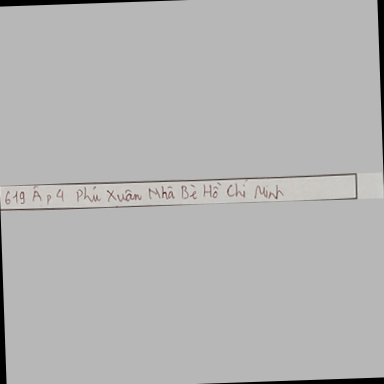

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Đông Vệ Thành Phố Thanh Hoá Thanh Hoá


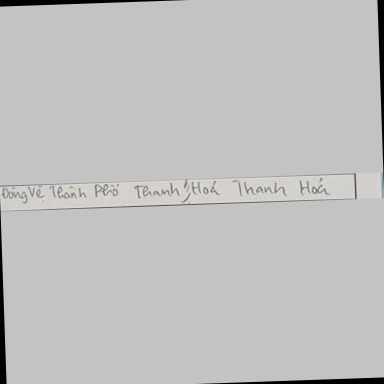

Trường THCS Ngoại ngữ, thuộc Huyện Bà Trường đại học Sư phạm Hà Nội
Tìm ra các contour từ ảnh nhị phân đã được chuyển sang gray


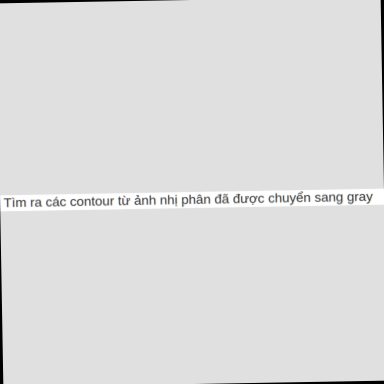

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Thôn Huổi Trẳng Tủa Thàng Tủa Chùa Điện Biên


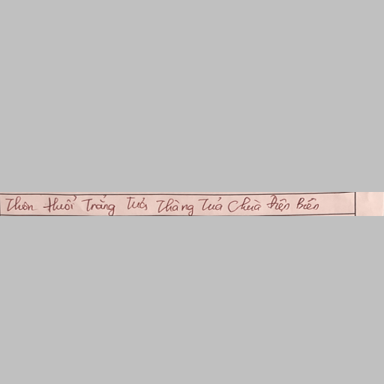

Theo báo cáo của một cuộc khảo sát
Ở Việt Nam, căn cứ khoảng 1 Điều 141


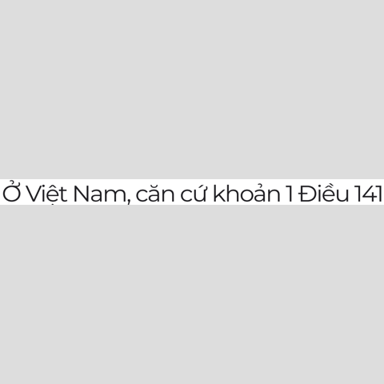

Trong đó, Trường đại học Sư phạm Hà Nội
ngành Kỹ thuật Điện và Điện tử đạt tốp


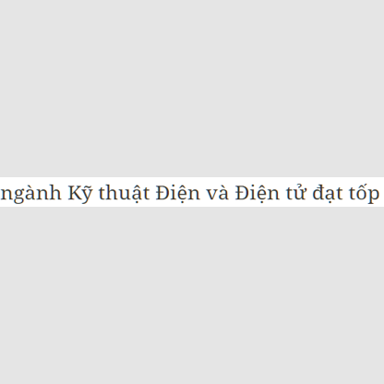

Trường THCS Ngoại ngữ, thuộc Trường đại học Ngữ Đại học Quốc Hà Nội
only change here is that our loss now includes the penalty term.


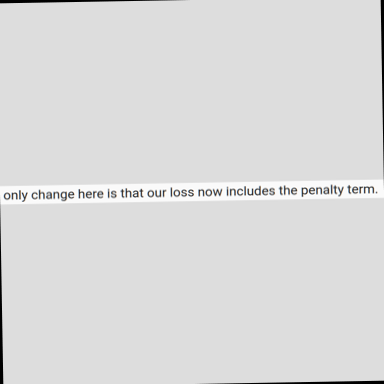

Trường THCS Ngoại ngữ, thuộc Huyện Bà Trường đại học Sư phạm Hà Nội
CÁC LAYER NÀY SẼ SẮP XẾP LẠI FEATURES MAP CÓ ĐỘ PHÂN GIẢI THẤP VỚI


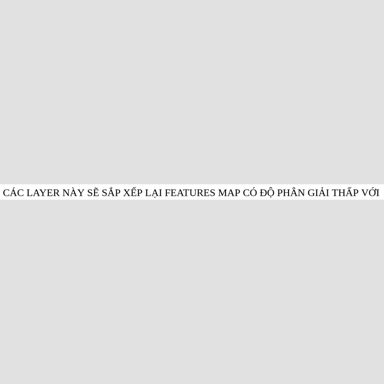

Thẩm gia đại gia thực hiệu thuận mẫu thân đối đệ
cô nương đặt mua của hồi môn đều đến đi ban đầu Thẩm gia tơ lụa,


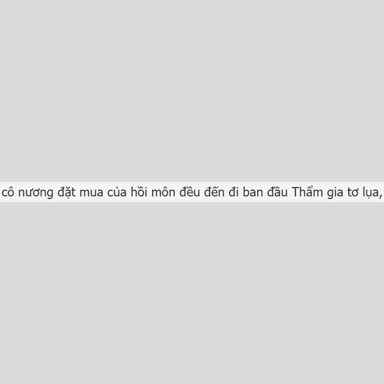

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
57 Thạch Hãn Thuận Hoà Thành Phố Huế Thừa Thiên Huế


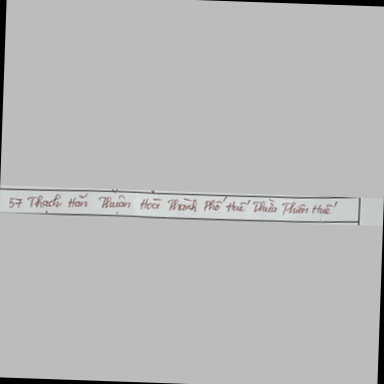

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
787/7 Hàn Hải Nguyên P 64 Q 97 Tp Hồ Chí Minh


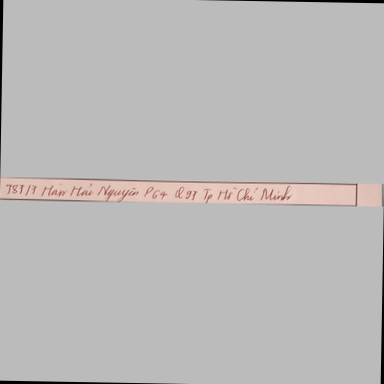

The Dewey shool phám shú trọng
Contact Us | National Resource Center


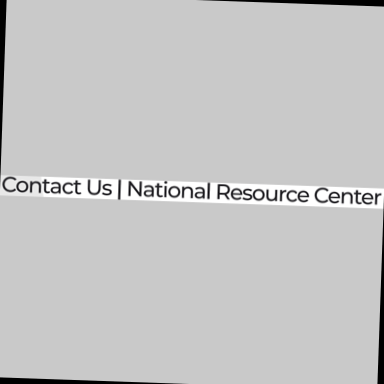

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
64 Bis Nguyễn Du P Bến Nghé Quận 5 Tp Hồ Chí Minh


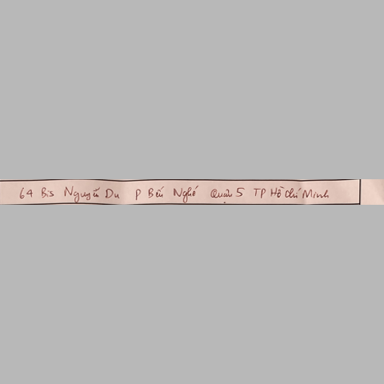

Trường THCS Ngoại ngữ, thuộc Trường đại học Ngữ Đại học Quốc Hà Nội
đốc Công ty AI Education giới thiệu các giải pháp của Google for Education giúp thúc


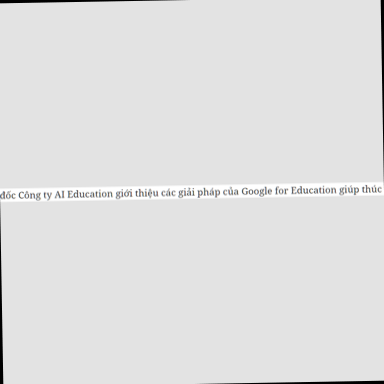

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận


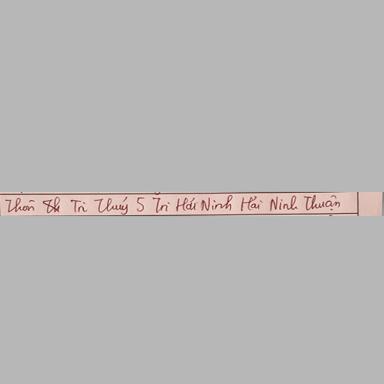

Trường THCS Ngoại ngữ tuyển sinh 100 chỉ tiêu vào lớp
Nhiều ý kiến đóng góp cho Dự thảo Luật Bảo hiểm xã hội


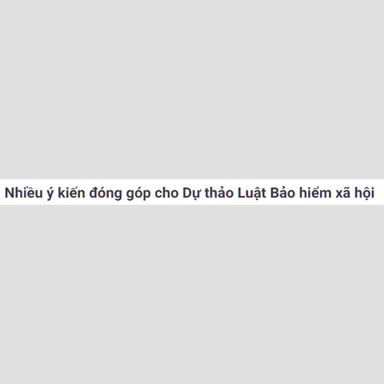

Thứ còn để lại được,
Không bắt chước được đâu


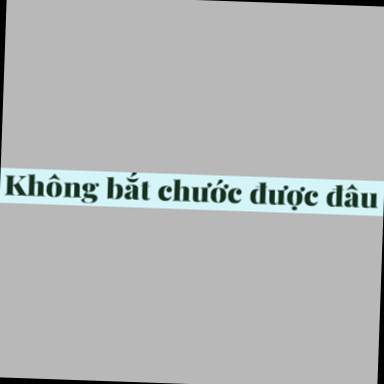

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
hoặc phạt rất nhẹ,


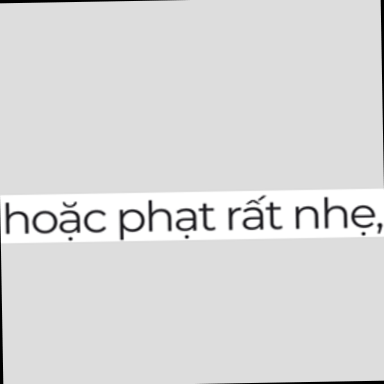

Trường THCS Ngoại ngữ tuyển sinh 100 chỉ tiêu vào lớp
Mô phỏng mẫu mới dựa trên tổng hợp mẫu cũ.


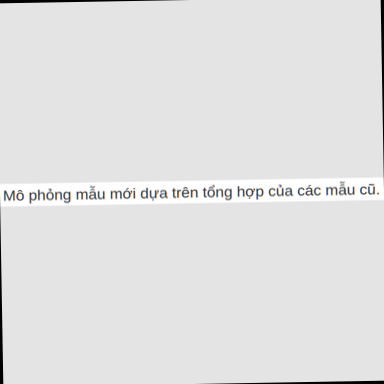

Trường đại học Sư phạm Hà Nội
MỘT HỆ THỐNG HÀNG ĐỢI CONG VIỆC PHÂN TÁN


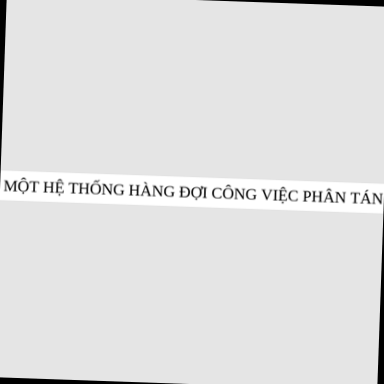

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
554/7 Nguyễn Văn Luông Phường 81 Quận 1 Tp Hồ Chí Minh


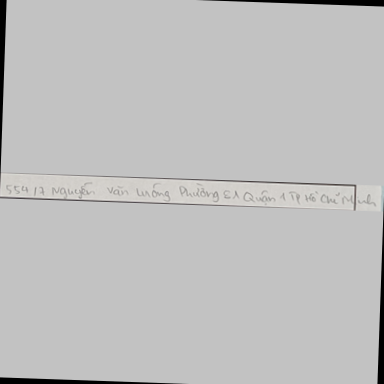

Trong đó, phương thức xét tuyển bằng 120
chọn ảnh từ thư viện ảnh trong máy, dịch


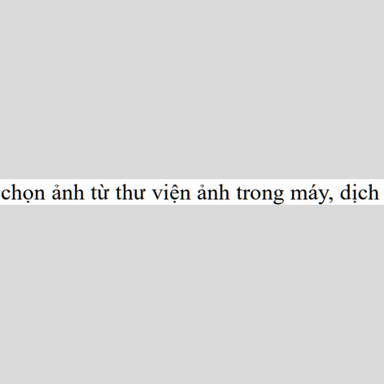

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Tk Đại Nam Thị Trấn Phú Xuyên Phú Xuyên Hà Nội


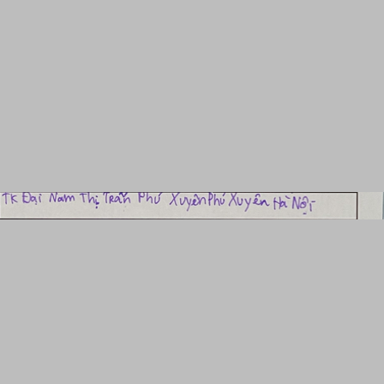

Thẩm phu nhân cầm lấy một thanh chạm rỗng làm thành
mà ta phụ thân cũng không có thu được?


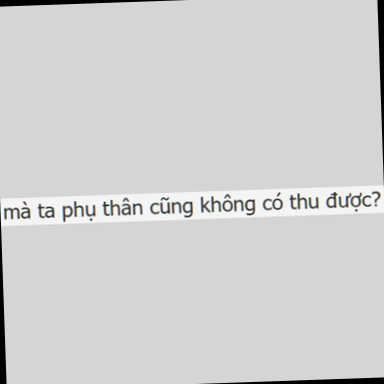

Thông tin về bộ dữ liệu:
2. Positional Encoding


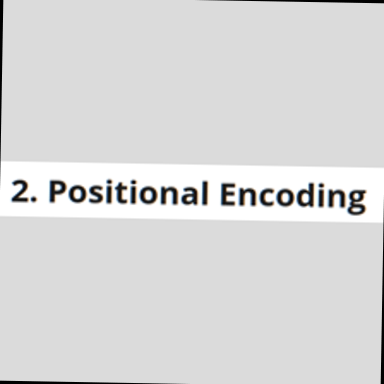

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
737/82 Ấp Hoà An Long Thới Chợ Lách Bến Tre


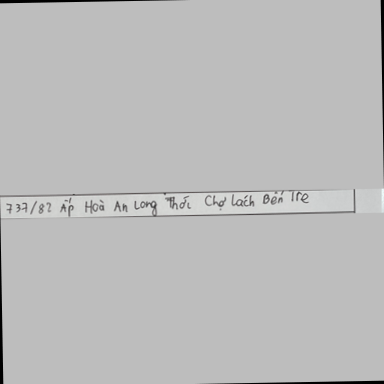

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
An Xuân Tuy An Phú Yên


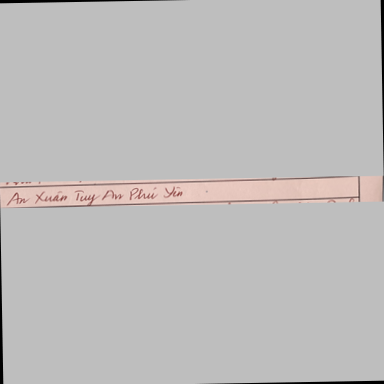

Thẩm phu nhân cầm lấy một thanh cạm rỗng làm thành nhiều nhiều nhật,
gia, ngươi nơi này muốn hay không cùng nhau đi vào. Ta đều chuẩn bị hảo."


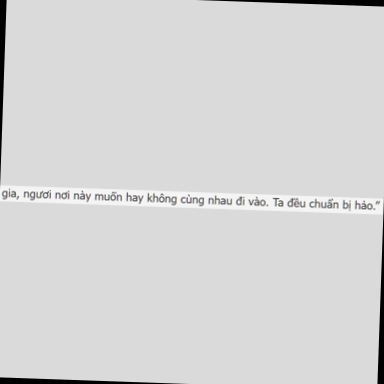

Thôn Tri Thuỷ 5 Tri Hải Ninh Hải Ninh Thuận
Thôn Đông Hoàng Tây Kim Bảng Hà Nam


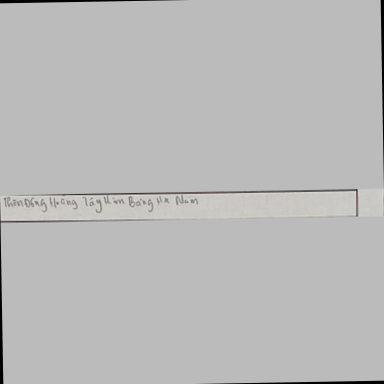

Cái kết của phim giúp mình thấy rõ Eugine luận của Hùng
Có nhiều lựa chọn trong đời sống nhưng nếu cho Hùng chọn,


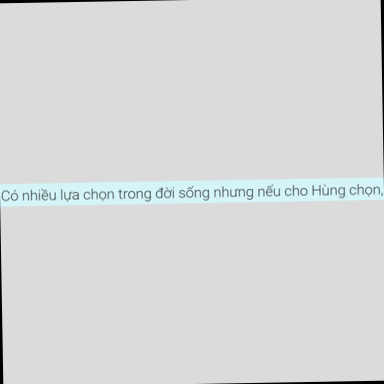

KeyboardInterrupt: 

In [6]:
v = list(vocab.keys())
model.eval()
with torch.no_grad():
    for t, path in enumerate(paths):
        import os
        image_path = os.path.join('dataset/augment_data/', path) 
        labels = [idx_start]
        image = Image.open(image_path).convert("RGB")
        # Encoder
        input_encoder = transform(image)
        input_encoder = input_encoder.unsqueeze(0).to(device)
        for _ in range(seq_length_decoder):
            # Decoder
            input_decoder = torch.Tensor(labels).int()
            input_decoder = torch.unsqueeze(input_decoder, 0).to(device)
            output = model(input_encoder, input_decoder)
            idx = torch.argmax(output[:, -1, :])
            labels.append(idx.cpu().item())
            if idx.cpu().item() == idx_end:
                break
        print(''.join([v[i] for i in labels[1:-1]]))
        print(true_labels[t])
        import IPython.display as ipd
        ipd.display(image)